In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm


C:\Users\arthurlegrix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [163]:
df_train = pd.read_csv("data/train.csv") 
df_test =  pd.read_csv("data/test.csv") 

In [164]:
print(df_train)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25          

In [165]:
df_train = df_train.drop(['Ticket','Cabin'], axis=1) 
df_test = df_test.drop(['Ticket','Cabin'], axis=1) 


In [166]:
df_train=  df_train.dropna()
df_test= df_test.dropna()

In [167]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.7000,S


In [168]:
def split(X):    
    to_dummy=['Pclass','Sex', 'Embarked']
    for dum in to_dummy:
        split_temp=pd.get_dummies(X[dum],prefix='split_'+dum)
        for col in split_temp:
            X[col]=split_temp[col]
        del X[dum]
    return X

df_test=split(df_test)
df_train=split(df_train)

In [169]:
df_train

,PassengerId,Survived,Name,Age,SibSp,Parch,Fare,split_Pclass_1,split_Pclass_2,split_Pclass_3,split_Sex_female,split_Sex_male,split_Embarked_C,split_Embarked_Q,split_Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,8.0500,0,0,1,0,1,0,0,1
6,7,0,"McCarthy, Mr. Timothy J",54.0,0,0,51.8625,1,0,0,0,1,0,0,1
7,8,0,"Palsson, Master. Gosta Leonard",2.0,3,1,21.0750,0,0,1,0,1,0,0,1
8,9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,11.1333,0,0,1,1,0,0,0,1
9,10,1,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,30.0708,0,1,0,1,0,1,0,0
10,11,1,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,16.7000,0,0,1,1,0,0,0,1


In [170]:
#y_train,x_train = dmatrices(formula, data=df_train, return_type='dataframe')
#pid, x_test=dmatrices(formula2, data=df_test, return_type='dataframe')

y=df_train['Survived']

df_train=df_train.drop(['PassengerId', 'Survived', "Name", "Parch"], axis=1)
df_test=df_test.drop(['PassengerId', "Name", "Parch"], axis=1)
df_train

,Age,SibSp,Fare,split_Pclass_1,split_Pclass_2,split_Pclass_3,split_Sex_female,split_Sex_male,split_Embarked_C,split_Embarked_Q,split_Embarked_S
0,22.0,1,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,53.1000,1,0,0,1,0,0,0,1
4,35.0,0,8.0500,0,0,1,0,1,0,0,1
6,54.0,0,51.8625,1,0,0,0,1,0,0,1
7,2.0,3,21.0750,0,0,1,0,1,0,0,1
8,27.0,0,11.1333,0,0,1,1,0,0,0,1
9,14.0,1,30.0708,0,1,0,1,0,1,0,0
10,4.0,1,16.7000,0,0,1,1,0,0,0,1


In [171]:
from sklearn.linear_model import LogisticRegression

#instantiate the model (using the default parameters)
logreg = LogisticRegression(fit_intercept=False)

#fit the model with data
logreg.fit(df_train, y)

#predict the response values for the observations in X
logreg.score(df_train, y)

0.8019662921348315

In [172]:
logreg.coef_

array([[-0.03892086, -0.35022449,  0.00201143,  1.45937818,  0.39939463,
        -0.74721255,  1.81530701, -0.70374675,  0.75447581, -0.01487446,
         0.37195892]])

In [173]:
proba=logreg.predict_proba(df_test)
proba

array([[ 0.94228854,  0.05771146],
       [ 0.67378881,  0.32621119],
       [ 0.93777974,  0.06222026],
       [ 0.89210639,  0.10789361],
       [ 0.43578526,  0.56421474],
       [ 0.83276299,  0.16723701],
       [ 0.52474485,  0.47525515],
       [ 0.77490687,  0.22509313],
       [ 0.24295697,  0.75704303],
       [ 0.92745327,  0.07254673],
       [ 0.64804851,  0.35195149],
       [ 0.07131165,  0.92868835],
       [ 0.93597619,  0.06402381],
       [ 0.1693574 ,  0.8306426 ],
       [ 0.14923538,  0.85076462],
       [ 0.83978317,  0.16021683],
       [ 0.81746842,  0.18253158],
       [ 0.48627691,  0.51372309],
       [ 0.4785971 ,  0.5214029 ],
       [ 0.70292922,  0.29707078],
       [ 0.80579426,  0.19420574],
       [ 0.30656469,  0.69343531],
       [ 0.08798546,  0.91201454],
       [ 0.96597697,  0.03402303],
       [ 0.03565468,  0.96434532],
       [ 0.82601881,  0.17398119],
       [ 0.60032427,  0.39967573],
       [ 0.89810679,  0.10189321],
       [ 0.81810823,

C:\Users\arthurlegrix\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'predicted chance of survival')

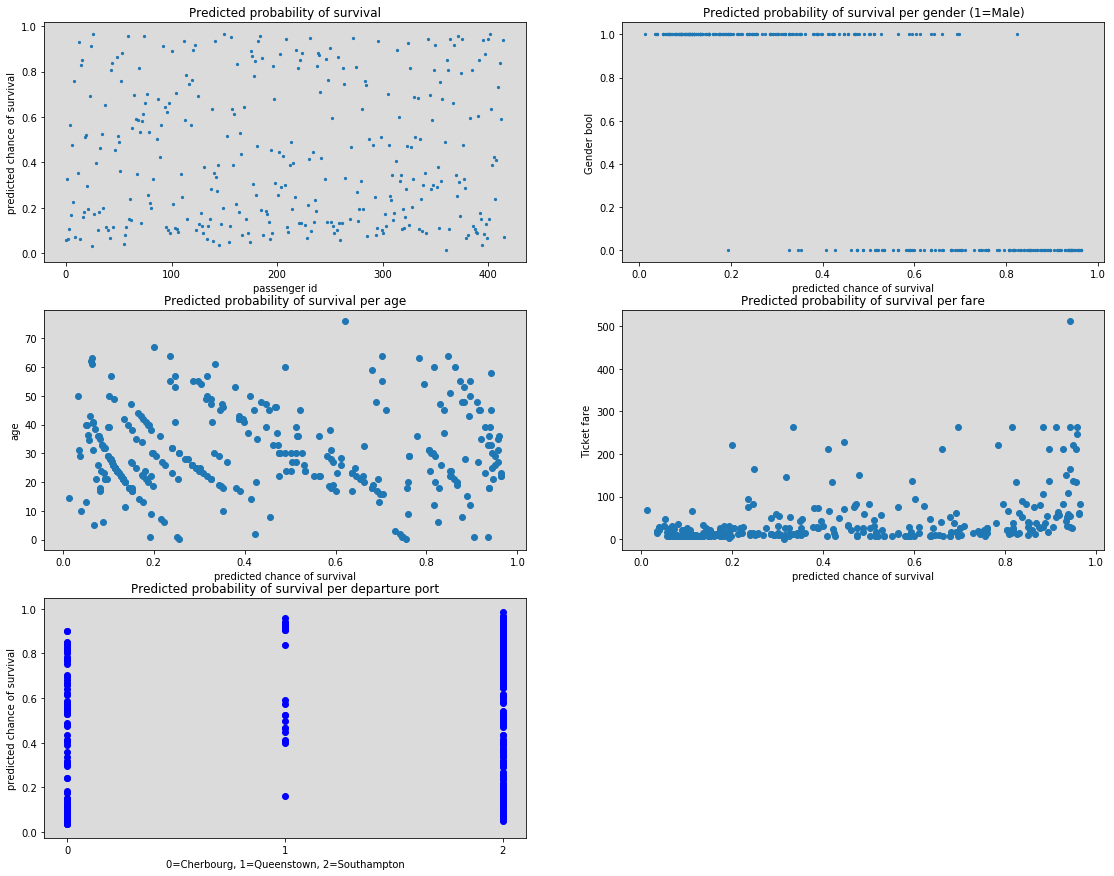

In [229]:
proba_list=[proba[k][1] for k in range(len(proba))]

fig=plt.figure(figsize=(19,15))

fig.add_subplot(321, axisbg="#DBDBDB")
plt.scatter(df_test.index, proba_list, s=5)
plt.title('Predicted probability of survival')
plt.xlabel('passenger id')
plt.ylabel('predicted chance of survival')

fig.add_subplot(322, axisbg="#DBDBDB")
plt.scatter(proba_list,df_test['split_Sex_male'], s=5)
plt.title('Predicted probability of survival per gender (1=Male)')
plt.xlabel('predicted chance of survival')
plt.ylabel('Gender bool')

fig.add_subplot(323, axisbg="#DBDBDB")
plt.scatter(proba_list, df_test['Age'])
plt.title('Predicted probability of survival per age')
plt.xlabel('predicted chance of survival')
plt.ylabel('age')

fig.add_subplot(324, axisbg="#DBDBDB")
plt.scatter(proba_list, df_test['Fare'])
plt.title('Predicted probability of survival per fare')
plt.xlabel('predicted chance of survival')
plt.ylabel('Ticket fare')


fig.add_subplot(325, axisbg="#DBDBDB")
plt.scatter([0 for k in range(len(proba)) if df_test.iloc[k,8]==1], [proba[k][0] for k in range(len(proba)) if df_test.iloc[k,8]==1], c="blue")
plt.scatter([1 for k in range(len(proba)) if df_test.iloc[k,9]==1], [proba[k][0] for k in range(len(proba)) if df_test.iloc[k,9]==1], c="blue")
plt.scatter([2 for k in range(len(proba)) if df_test.iloc[k,10]==1], [proba[k][0] for k in range(len(proba)) if df_test.iloc[k,10]==1], c='blue')
plt.xticks([0,1,2])

#1, [proba[k][0] for k in range(len(proba)) if df_test.iloc[k,9]=='1'], 2, [proba[k][0] for k in range(len(proba)) if df_test.iloc[k,9]=='1'])
plt.title('Predicted probability of survival per departure port')
plt.xlabel('0=Cherbourg, 1=Queenstown, 2=Southampton')
plt.ylabel('predicted chance of survival')

Text(0,0.5,'predicted chance of survival')

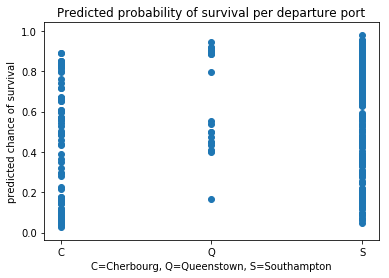

In [60]:
plt.scatter(df_test['Embarked'], [proba[k][0] for k in range(len(proba))])
plt.title('Predicted probability of survival per departure port')
plt.xlabel('C=Cherbourg, Q=Queenstown, S=Southampton')
plt.ylabel('predicted chance of survival')

In [197]:
df_test

,Age,SibSp,Fare,split_Pclass_1,split_Pclass_2,split_Pclass_3,split_Sex_female,split_Sex_male,split_Embarked_C,split_Embarked_Q,split_Embarked_S
0,34.5,0,7.8292,0,0,1,0,1,0,1,0
1,47.0,1,7.0000,0,0,1,1,0,0,0,1
2,62.0,0,9.6875,0,1,0,0,1,0,1,0
3,27.0,0,8.6625,0,0,1,0,1,0,0,1
4,22.0,1,12.2875,0,0,1,1,0,0,0,1
5,14.0,0,9.2250,0,0,1,0,1,0,0,1
6,30.0,0,7.6292,0,0,1,1,0,0,1,0
7,26.0,1,29.0000,0,1,0,0,1,0,0,1
8,18.0,0,7.2292,0,0,1,1,0,1,0,0
9,21.0,2,24.1500,0,0,1,0,1,0,0,1


In [201]:
proba_list_M=[proba[k][1] for k in range(len(proba)) if df_test.iloc[k,7]==1]
proba_list_F=[proba[k][1] for k in range(len(proba)) if df_test.iloc[k,6]==1]

Text(0,0.5,'Number of occurences')

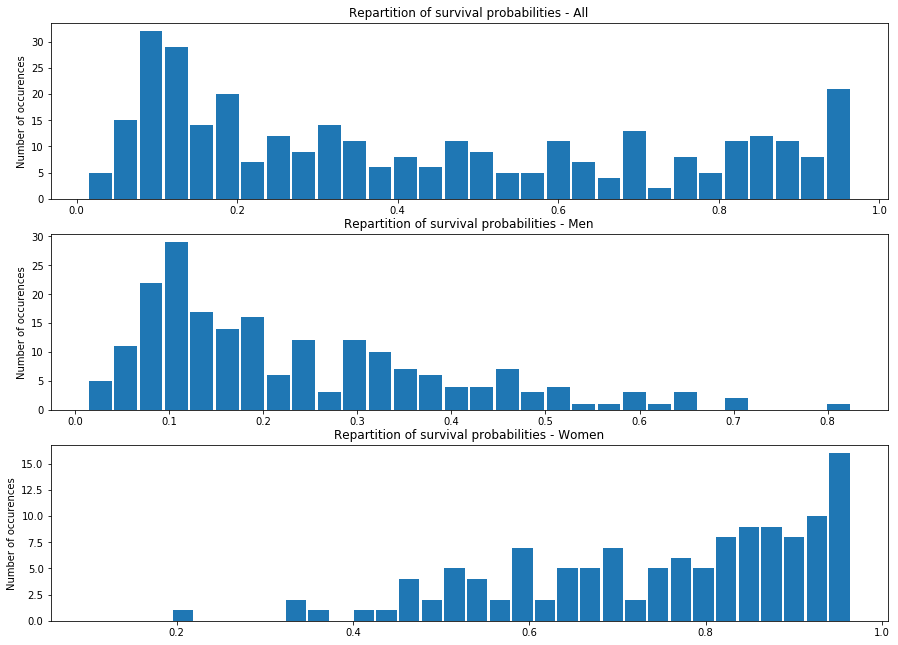

In [238]:
fig=plt.figure(figsize=(15,11))

fig.add_subplot(311)
plt.hist(proba_list, 30, histtype='barstacked', rwidth=0.9)
plt.step(0.1,10)
plt.title('Repartition of survival probabilities - All')
#plt.xlabel('Probability of survival')
plt.ylabel('Number of occurences')

fig.add_subplot(312)

plt.hist(proba_list_M, 30, histtype='barstacked', rwidth=0.9)
plt.step(0.1,10)
plt.title('Repartition of survival probabilities - Men')
#plt.xlabel('Probability of survival')
plt.ylabel('Number of occurences')

fig.add_subplot(313)

plt.hist(proba_list_F, 30, histtype='barstacked', rwidth=0.9)
plt.step(0.1,10)
plt.title('Repartition of survival probabilities - Women')
#plt.xlabel('Probability of survival')
plt.ylabel('Number of occurences')